In [1]:
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import escreve_xlsx as es

In [61]:
path = "C:\\saida_teste\\relatorio_json_atualizado.xlsx"
# path = "C:\\saida_teste\\dados_reais_2kamostras.xlsx"

with open(path + ".txt", 'r') as file:
    text = file.read()
    
text = text.replace("\'", "\"")
text = text.replace("nan", "\"nan\"")
data = json.loads(text)
data

{'medido': {'et1': [6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [91]:
def get_lis_categoria(categoria, descritor, r_medido, r_max):
    def cr_f_categoria(categoria):
        def filter_categoria(element):
            return element['categoria'] == categoria
        return filter_categoria
    
    def map_element(element):
        return lambda x: x[element]
#     def c_map(element):
#         return element['list_kappa_cat']
#     def c_map_2(element):
#         return element
    strin = ""
    if(r_max):
        strin = "list_kappa_cat_max"
    else:
        strin = "list_kappa_cat"

    saida = []
    if (r_medido):
        saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
    else:
        for item in data['varios_kappa']:
            saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
    
    saida = list(map(map_element(descritor), saida))
    
    return saida





In [ ]:
data['çs']

In [93]:
# # pega os dados medidos
# get_lis_categoria('Swimming','kappa', True, True)
# # pega os dados bootstrap
# get_lis_categoria('Swimming', 'kappa', False, True)

[0.979969,
 0.979969,
 0.979969,
 0.979969,
 0.979969,
 0.985706,
 0.985706,
 0.985706,
 0.985706]

In [97]:

amax = get_lis_categoria('Swimming', 'kappa', False, True)

ames = get_lis_categoria('Swimming', 'kappa', False, False)

ames, amax

([0.563945,
  0.563945,
  0.563945,
  0.563945,
  0.563945,
  0.542603,
  0.542603,
  0.542603,
  0.542603],
 [0.979969,
  0.979969,
  0.979969,
  0.979969,
  0.979969,
  0.985706,
  0.985706,
  0.985706,
  0.985706])

In [7]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [8]:
data['medido']['catalogo_var']

{'categoria': 'Catalog',
 'observada': 0.849145,
 'acaso': 0.32738,
 'vies': 0.133899,
 'kappa': 0.775721,
 'prevalencia': 0.652133,
 'matriz_concordancia': [[411, 271, 16, 0, 6, 53, 0],
  [176, 2393, 52, 0, 45, 140, 7],
  [6, 6, 572, 4, 0, 67, 0],
  [0, 2, 7, 118, 0, 0, 0],
  [5, 24, 6, 0, 10, 2, 0],
  [38, 95, 66, 15, 12, 2798, 0],
  [0, 0, 0, 0, 0, 0, 8]]}

In [28]:
dt =     es.get_descritores_max(False, data)
dt_max = es.get_descritores_max(True, data)

dt

{'categoria': ['Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',

In [31]:
len(dt['observada'])

1667

In [10]:
plt.rcParams["figure.figsize"] = (10,5)

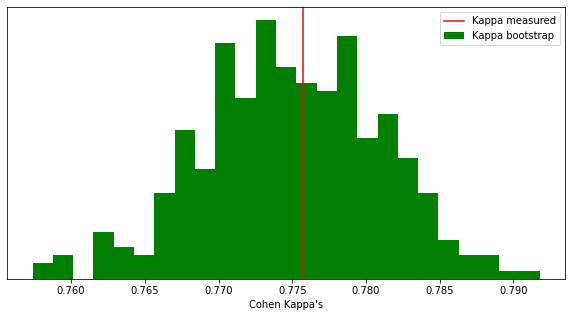

In [35]:
# x = dt['kappa']
plt.tick_params(left = False, labelleft = False)
num_bins = 2

H1 = dt['kappa']
S1 = dt_max['kappa']

# plt.hist([H1,S1], bins=25, range=(0.4,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

plt.hist([H1], bins=25, align=('mid'), color=['green'], label=['Kappa bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

plt.axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
plt.xlabel("Cohen Kappa's")
# Function add a legend  
plt.legend()
plt.show()

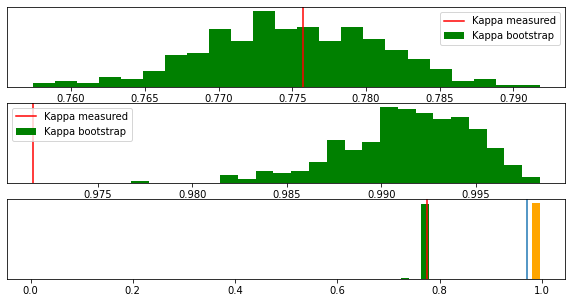

In [49]:
fig, axs = plt.subplots(3)
axs[0].tick_params(left = False, labelleft = False)
axs[1].tick_params(left = False, labelleft = False)
axs[2].tick_params(left = False, labelleft = False)
num_bins = 23

H1 = dt['kappa']
S1 = dt_max['kappa']

axs[0].hist([H1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
axs[1].hist([S1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
axs[2].hist([H1,S1], bins=25, range=(0,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

axs[0].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
axs[1].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa measured", color='red')

axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# axs[0].xlabel("Cohen Kappa's")
# Function add a legend  
axs[0].legend()
axs[1].legend()
plt.show()

In [12]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [13]:
dt_max['kappa']

[0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.991958,
 0.991958

In [56]:
def cret_line(valor):
    def creat_lvl(valor):
        return lambda x: valor

    return [creat_lvl(valor)(x) for x in range(2)]





In [57]:
generate

[1, 1]

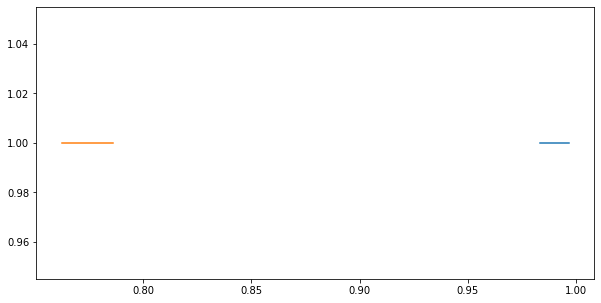

In [58]:
plt.plot(con_m, generate, label = "curve 1")
plt.plot(con_max, generate, label = "curve 1")

Text(0.5, 0, 'Cohen Kappa')

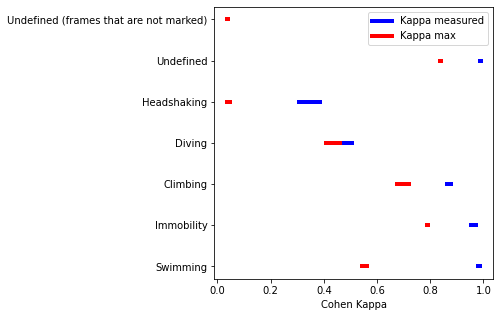

In [119]:
plt.rcParams["figure.figsize"] = (5,5)
y_pos = []
fig, ax = plt.subplots()
for i, cat in enumerate(data['ls_cat_txt'], 1):
    amax = get_lis_categoria(cat, 'kappa', False, True)
    ames = get_lis_categoria(cat, 'kappa', False, False)
    confidence = 0.95
    generate = cret_line(i)
    con_m   = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    
    y_pos.append(i)

    if(i==1):
        ax.plot(con_m, generate, label = "Kappa measured", color= "blue", linewidth=4.0)
        ax.plot(con_max, generate, label = "Kappa max", color ="red", linewidth=4.0)
    else:
        ax.plot(con_m, generate, color= "blue", linewidth=4.0)
        ax.plot(con_max, generate, color ="red", linewidth=4.0)
        

ax.legend()
ax.set_yticks(y_pos)
ax.set_yticklabels(data['ls_cat_txt'])
ax.set_xlabel("Cohen Kappa")